In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i)) 
data = processed_data
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.33, 
                                                    random_state = 2)

# Random Forest Regressor

In [2]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 50)
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [3]:
print(np.mean(rf_model.predict(X) != y))
print(np.mean(rf_model.predict(X_test) != y_test))
from sklearn.model_selection import GridSearchCV

0.791666666667
0.882575757576


## Зависимость ошибок от количества деревьев

In [9]:
from sklearn.model_selection import GridSearchCV
est_number = np.arange(1, 100)
rf_model = ensemble.RandomForestRegressor()
grid = GridSearchCV(rf_model, param_grid = {'n_estimators': est_number})
grid.fit(X, y)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.n_estimators
print(min_err_cv)
print(argmin_err_cv)

0.465850402289
87


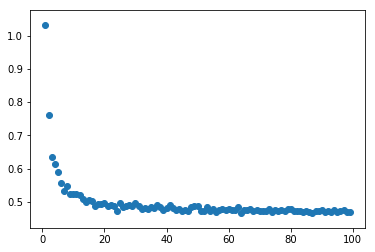

In [10]:
score = 1 - np.array([i for i in grid.cv_results_['mean_test_score']])
depth = np.array([i['n_estimators'] for i in grid.cv_results_['params']])
plt.scatter(depth, score)